In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

In [2]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []

for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)

### Make dataframes with every kind of variable and then export those

In [3]:
data.columns = ["recording"]

In [4]:
## Dataframe for acceleration data
acceleration = []
for row in data["recording"]:
    acceleration.extend([[row.data["ax"],row.data["ay"],row.data["az"]]])

acceleration = np.array(acceleration)

In [5]:
data["recording"][0]

Recording(filename='train_trace_000.pkl', labels={'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}, data={'altitude': Trace(title='altitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'ax': Trace(title='ax', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'ay': Trace(title='ay', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'az': Trace(title='az', total_time=584.87, samplerate=200.30, max_update_gap=0.04), 'bearing': Trace(title='bearing', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'gx': Trace(title='gx', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gy': Trace(title='gy', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gz': Trace(title='gz', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'latitude': Trace(title='latitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'longitude': Trace(title='longitude', total_time=584.87, samplerate=12.52, max_update_

In [6]:
len(acceleration)

396

In [7]:
acceleration.shape

(396, 3)

In [59]:
data["recording"][1].data["packetNumber"]

Trace(title='packetNumber', total_time=519.01, samplerate=12.52, max_update_gap=0.27)

Some labels are incomplete: These are note, phone_steps, lost_packets, phone_orientationx, y, z

Unsure what to do with timestamp labels, packet_number

In [18]:
to_export = np.concatenate((acceleration,gyroscope,magnetometer,temperature,phone_magnetometer,not_input,
                            phone_gyroscope,phone_gravy,phone_rotm,phone_la,phone_rotation),axis=1)

#### Figure out how to make a nice signal dataframe

In [19]:
new_list = []
for x, t in list(zip(to_export[1][0].timestamps, to_export[1][0].values)):
    new_list.append([x,t])

In [23]:
def export_signals_as_csv(input_sample, sample_nr):
    bigger_list = []
    for feature in input_sample:
        inside_list = []
        for x, t in list(zip(feature.timestamps, feature.values)):
            inside_list.append([x,t])
        bigger_list.append(inside_list)
    bigger_list = pd.DataFrame(bigger_list)
    bigger_list.to_csv(f'extracted_signal_{sample_nr}.csv')

In [26]:
index = 0
for sample in to_export:
    export_signals_as_csv(sample, index)
    index = index + 1

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001232BA33550>>
Traceback (most recent call last):
  File "c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

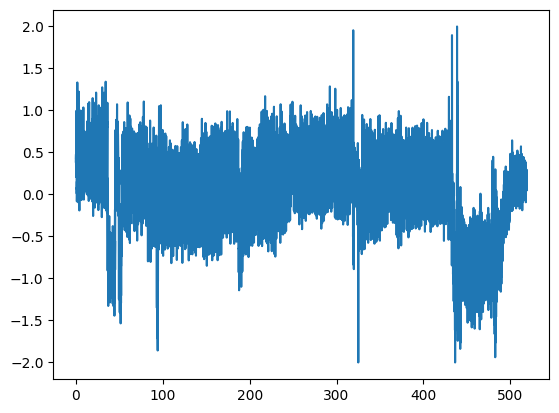

In [27]:
from scipy.fft import fft, fftfreq

new_list = pd.DataFrame(new_list)
plt.plot(new_list[0],new_list[1])

In [5]:
import scipy.stats as stats

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

In [6]:
def features_extraction(df): 
    
    
    Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
    FormFactor=[]; PulseIndicator=[];
    Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
    
    X = df.values
    ## TIME DOMAIN ##

    Min.append(np.min(X))
    Max.append(np.max(X))
    Mean.append(np.mean(X))
    Rms.append(np.sqrt(np.mean(X**2)))
    Var.append(np.var(X))
    Std.append(np.std(X))
    Power.append(np.mean(X**2))
    Peak.append(np.max(np.abs(X)))
    P2p.append(np.ptp(X))
    CrestFactor.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
    Skew.append(stats.skew(X))
    Kurtosis.append(stats.kurtosis(X))
    FormFactor.append(np.sqrt(np.mean(X**2))/np.mean(X))
    PulseIndicator.append(np.max(np.abs(X))/np.mean(X))
    ## FREQ DOMAIN ##
    ft = fft(X)
    S = np.abs(ft**2)/len(df)
    Max_f.append(np.max(S))
    Sum_f.append(np.sum(S))
    Mean_f.append(np.mean(S))
    Var_f.append(np.var(S))
    
    Peak_f.append(np.max(np.abs(S)))
    Skew_f.append(stats.skew(X))
    Kurtosis_f.append(stats.kurtosis(X))
    #Create dataframe from features
    df_features = pd.DataFrame(index = [FEATURES], 
                               data = [Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,
                                       Max_f,Sum_f,Mean_f,Var_f,Peak_f,Skew_f,Kurtosis_f])
    return df_features

This requires a dataframe with accelerometer data and the time points

In [12]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [36]:
from scipy.fft import fft, fftfreq

inside_list = []
sample_rate = acceleration[0,0].samplerate
for x, t in list(zip(acceleration[0,0].timestamps, acceleration[0,0].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)

In [37]:
# Filter requirements.
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)

In [38]:
trial = pd.DataFrame.transpose(features_signal)

In [41]:
for sample in acceleration[1:,0]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])

In [44]:
trial.to_csv(f'extracted_signal_accelerator_x_lowpass.csv')

In [45]:
inside_list = []
sample_rate = acceleration[0,1].samplerate
for x, t in list(zip(acceleration[0,1].timestamps, acceleration[0,1].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)
trial = pd.DataFrame.transpose(features_signal)
for sample in acceleration[1:,1]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])
trial.to_csv(f'extracted_signal_accelerator_y_lowpass.csv')

In [47]:
inside_list = []
sample_rate = acceleration[0,2].samplerate
for x, t in list(zip(acceleration[0,2].timestamps, acceleration[0,2].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)
trial = pd.DataFrame.transpose(features_signal)
for sample in acceleration[1:,2]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])
trial.to_csv(f'extracted_signal_accelerator_z_lowpass.csv')

### Visualize labels - Create a dataframe with all the labels

In [48]:
data["recording"][0].labels

{'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}

In [49]:
labels = []
for sample in data["recording"]:
    labels.extend([[sample.labels["path_idx"],sample.labels["activities"],sample.labels["step_count"],sample.labels["watch_loc"]]])

In [50]:
labels = pd.DataFrame(labels)

In [51]:
labels.head(20)

,0,1,2,3
0,2,[1],NaN,1
1,0,"[1, 2]",NaN,0
2,0,"[0, 1, 2]",NaN,0
3,2,[1],NaN,1
4,1,[1],NaN,1
5,1,[1],NaN,2
6,3,[1],NaN,1
7,0,[1],NaN,1
8,1,[1],NaN,2
9,3,[1],NaN,0


Path index, longitude, latitude, speed, phone steps and activity

### Random forests on path index and smartwatch location

Merge both, the accelerator and label dataframes

In [52]:
accelerator_x = pd.read_csv("extracted_signal_accelerator_x_lowpass.csv")
accelerator_y = pd.read_csv("extracted_signal_accelerator_y_lowpass.csv")
accelerator_z = pd.read_csv("extracted_signal_accelerator_z_lowpass.csv")

In [53]:
accelerator_x = accelerator_x.rename(columns={"MIN":"min_x","MAX":"max_x","MEAN":"mean_x","RMS":"rms_x","VAR":"var_x",
                              "STD":"std_x","POWER":"power_x","PEAK":"peak_x","P2P":"p2p_x","CREST FACTOR":"crest factor x",
                              "SKEW":"skew x","KURTOSIS":"kurtosis x","MAX_f":"max f x","SUM_f":"sum f x",
                              "MEAN_f":"mean f x", "VAR_f":"var f x","PEAK_f":"peak f x","SKEW_f":"skew f x","KURTOSIS_f":"kurtosis f x"})

In [54]:
accelerator_y = accelerator_y.rename(columns={"MIN":"min_y","MAX":"max_y","MEAN":"mean_y","RMS":"rms_y","VAR":"var_y",
                              "STD":"std_y","POWER":"power_y","PEAK":"peak_y","P2P":"p2p_y","CREST FACTOR":"crest factor y",
                              "SKEW":"skew y","KURTOSIS":"kurtosis y","MAX_f":"max f y","SUM_f":"sum f y",
                              "MEAN_f":"mean f y", "VAR_f":"var f y","PEAK_f":"peak f y","SKEW_f":"skew f y","KURTOSIS_f":"kurtosis f y"})

In [55]:
accelerator_z = accelerator_z.rename(columns={"MIN":"min_z","MAX":"max_z","MEAN":"mean_z","RMS":"rms_z","VAR":"var_z",
                              "STD":"std_z","POWER":"power_z","PEAK":"peak_z","P2P":"p2p_z","CREST FACTOR":"crest factor z",
                              "SKEW":"skew z","KURTOSIS":"kurtosis z","MAX_f":"max f z","SUM_f":"sum f z",
                              "MEAN_f":"mean f z", "VAR_f":"var f z","PEAK_f":"peak f z","SKEW_f":"skew f z","KURTOSIS_f":"kurtosis f z"})

In [56]:
random_forest_data = pd.concat([accelerator_x,accelerator_y,accelerator_z],axis=1)

In [57]:
random_forest_data = pd.concat([random_forest_data,labels[0],labels[3]],axis=1)

In [58]:
random_forest_data = random_forest_data.rename(columns={0:"path_index",3:"smartwatch_location"})

In [59]:
random_forest_data.columns

Index(['Unnamed: 0', 'min_x', 'max_x', 'mean_x', 'rms_x', 'var_x', 'std_x',
       'power_x', 'peak_x', 'p2p_x', 'crest factor x', 'skew x', 'kurtosis x',
       'max f x', 'sum f x', 'mean f x', 'var f x', 'peak f x', 'skew f x',
       'kurtosis f x', 'Unnamed: 0', 'min_y', 'max_y', 'mean_y', 'rms_y',
       'var_y', 'std_y', 'power_y', 'peak_y', 'p2p_y', 'crest factor y',
       'skew y', 'kurtosis y', 'max f y', 'sum f y', 'mean f y', 'var f y',
       'peak f y', 'skew f y', 'kurtosis f y', 'Unnamed: 0', 'min_z', 'max_z',
       'mean_z', 'rms_z', 'var_z', 'std_z', 'power_z', 'peak_z', 'p2p_z',
       'crest factor z', 'skew z', 'kurtosis z', 'max f z', 'sum f z',
       'mean f z', 'var f z', 'peak f z', 'skew f z', 'kurtosis f z',
       'path_index', 'smartwatch_location'],
      dtype='object')

In [60]:
random_forest_data = random_forest_data.drop('Unnamed: 0',axis=1)

Find out where labels for both classes are not given - There are no missing values for these labels in the training set

#### Extract signals from test set and predict path indices and smartwatch locations

In [62]:
### Extraction of features from signals
files_test = os.listdir('data/test')
list_of_dfs = []

for file in files_test:
    d = Recording(os.path.join('data/test',file))
    list_of_dfs.append(d)

data_test = pd.DataFrame(list_of_dfs)

In [91]:
data_test.columns = ["recording"]

acceleration = []
for row in data_test["recording"]:
    acceleration.extend([[row.data["ax"],row.data["ay"],row.data["az"]]])

acceleration = np.array(acceleration)

inside_list = []
for x, t in list(zip(acceleration[0,0].timestamps, acceleration[0,0].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_x = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,0]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_x = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [67]:
inside_list = []
for x, t in list(zip(acceleration[0,1].timestamps, acceleration[0,1].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_y = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,1]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_y = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [66]:
inside_list = []
for x, t in list(zip(acceleration[0,2].timestamps, acceleration[0,2].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_z = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,2]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_z = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [68]:
features_test_x = features_test_x.rename(columns={"MIN":"min_x","MAX":"max_x","MEAN":"mean_x","RMS":"rms_x","VAR":"var_x",
                              "STD":"std_x","POWER":"power_x","PEAK":"peak_x","P2P":"p2p_x","CREST FACTOR":"crest factor x",
                              "SKEW":"skew x","KURTOSIS":"kurtosis x","MAX_f":"max f x","SUM_f":"sum f x",
                              "MEAN_f":"mean f x", "VAR_f":"var f x","PEAK_f":"peak f x","SKEW_f":"skew f x","KURTOSIS_f":"kurtosis f x"})

In [69]:
features_test_y = features_test_y.rename(columns={"MIN":"min_y","MAX":"max_y","MEAN":"mean_y","RMS":"rms_y","VAR":"var_y",
                              "STD":"std_y","POWER":"power_y","PEAK":"peak_y","P2P":"p2p_y","CREST FACTOR":"crest factor y",
                              "SKEW":"skew y","KURTOSIS":"kurtosis y","MAX_f":"max f y","SUM_f":"sum f y",
                              "MEAN_f":"mean f y", "VAR_f":"var f y","PEAK_f":"peak f y","SKEW_f":"skew f y","KURTOSIS_f":"kurtosis f y"})

In [70]:
features_test_z = features_test_z.rename(columns={"MIN":"min_z","MAX":"max_z","MEAN":"mean_z","RMS":"rms_z","VAR":"var_z",
                              "STD":"std_z","POWER":"power_z","PEAK":"peak_z","P2P":"p2p_z","CREST FACTOR":"crest factor z",
                              "SKEW":"skew z","KURTOSIS":"kurtosis z","MAX_f":"max f z","SUM_f":"sum f z",
                              "MEAN_f":"mean f z", "VAR_f":"var f z","PEAK_f":"peak f z","SKEW_f":"skew f z","KURTOSIS_f":"kurtosis f z"})

In [85]:
random_forest_data_test = pd.concat([features_test_y,features_test_z],axis=1)

In [87]:
random_forest_data_test = pd.concat([random_forest_data_test,features_test_x],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [76]:
random_forest_data_test = random_forest_data_test.drop('Unnamed: 0',axis=1)

NameError: name 'random_forest_data_test' is not defined

#### Random Forest

In [102]:
random_forest_data.iloc[:,:-2]

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,...,crest factor z,skew z,kurtosis z,max f z,sum f z,mean f z,var f z,peak f z,skew f z,kurtosis f z
0,-1.594727,584.874,146.426752,238.774597,35572.514370,188.606772,57013.308149,584.874,586.468727,2.449482,...,2.449474,[ 1.35305100e-16 -6.82611184e-01],[-1.2 0.39996248],2.925951,228054.628689,0.973328,0.757916,2.925951,[ 1.35305100e-16 -6.82611184e-01],[-1.2 0.39996248]
1,-2.000000,519.009,129.792714,211.885307,28049.234710,167.479058,44895.383338,519.009,521.009000,2.449481,...,2.449474,[-8.73009024e-17 -7.19983533e-01],[-1.2 3.63198701],2.597143,179582.607258,0.863910,0.597088,2.597143,[-8.73009024e-17 -7.19983533e-01],[-1.2 3.63198701]
2,-2.000000,594.119,148.288870,242.549098,36840.476287,191.938731,58830.065116,594.119,596.119000,2.449479,...,2.449483,[-4.07236997e-16 1.37633061e+00],[-1.2 4.78991391],2.974939,235319.457771,0.990135,0.784303,2.974939,[-4.07236997e-16 1.37633061e+00],[-1.2 4.78991391]
3,-0.330566,519.631,130.390093,212.140212,28001.893174,167.337662,45003.469581,519.631,519.961566,2.449470,...,2.449482,[-1.73948781e-16 3.04544287e-01],[-1.2 0.84724],2.597753,180011.992263,0.865842,0.599752,2.597753,[-1.73948781e-16 3.04544287e-01],[-1.2 0.84724]
4,-2.000000,625.444,155.877247,255.337932,40899.743530,202.236850,65197.459509,625.444,627.444000,2.449475,...,2.449485,[ 5.38995380e-16 -6.33138321e-01],[-1.2 0.60304484],3.129320,260787.906692,1.042685,0.869761,3.129320,[ 5.38995380e-16 -6.33138321e-01],[-1.2 0.60304484]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-2.000000,325.703,81.454938,132.970551,11046.260493,105.101192,17681.167498,325.703,327.703000,2.449437,...,2.449462,[-7.04745435e-17 -1.18752027e+00],[-1.2 1.65599164],1.635484,70723.244199,0.543022,0.235928,1.635484,[-7.04745435e-17 -1.18752027e+00],[-1.2 1.65599164]
392,-1.355957,619.135,154.629251,252.761419,39978.129659,199.945317,63888.335041,619.135,620.490957,2.449484,...,2.449485,[-1.14931780e-15 5.41842553e-02],[-1.2 -0.25912203],3.096375,255553.163728,1.031921,0.851897,3.096375,[-1.14931780e-15 5.41842553e-02],[-1.2 -0.25912203]
393,-2.000000,747.647,186.978083,305.226219,58202.241105,241.251406,93163.044685,747.647,749.647000,2.449485,...,2.449484,[-7.91581834e-16 3.15884265e-02],[-1.2 1.73586245],3.744431,372652.406463,1.245896,1.241817,3.744431,[-7.91581834e-16 3.15884265e-02],[-1.2 1.73586245]
394,-2.000000,456.008,113.770841,186.165349,21713.732956,147.355804,34657.537136,456.008,458.008000,2.449478,...,2.449483,[9.16801767e-16 7.77343694e-01],[-1.2 4.3891789],2.289096,138629.679831,0.760031,0.462124,2.289096,[9.16801767e-16 7.77343694e-01],[-1.2 4.3891789]


In [104]:
random_forest_data.drop(columns=["skew x","skew y","skew z","kurtosis x","kurtosis y","kurtosis z",
                                     "skew f x","skew f y","skew f z","kurtosis f x","kurtosis f y","kurtosis f z"])

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,...,peak_z,p2p_z,crest factor z,max f z,sum f z,mean f z,var f z,peak f z,path_index,smartwatch_location
0,-1.594727,584.874,146.426752,238.774597,35572.514370,188.606772,57013.308149,584.874,586.468727,2.449482,...,584.874,586.873939,2.449474,2.925951,228054.628689,0.973328,0.757916,2.925951,2,1
1,-2.000000,519.009,129.792714,211.885307,28049.234710,167.479058,44895.383338,519.009,521.009000,2.449481,...,519.009,521.009000,2.449474,2.597143,179582.607258,0.863910,0.597088,2.597143,0,0
2,-2.000000,594.119,148.288870,242.549098,36840.476287,191.938731,58830.065116,594.119,596.119000,2.449479,...,594.119,595.962994,2.449483,2.974939,235319.457771,0.990135,0.784303,2.974939,0,0
3,-0.330566,519.631,130.390093,212.140212,28001.893174,167.337662,45003.469581,519.631,519.961566,2.449470,...,519.631,520.902728,2.449482,2.597753,180011.992263,0.865842,0.599752,2.597753,2,1
4,-2.000000,625.444,155.877247,255.337932,40899.743530,202.236850,65197.459509,625.444,627.444000,2.449475,...,625.444,627.444000,2.449485,3.129320,260787.906692,1.042685,0.869761,3.129320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-2.000000,325.703,81.454938,132.970551,11046.260493,105.101192,17681.167498,325.703,327.703000,2.449437,...,325.703,327.703000,2.449462,1.635484,70723.244199,0.543022,0.235928,1.635484,3,2
392,-1.355957,619.135,154.629251,252.761419,39978.129659,199.945317,63888.335041,619.135,620.490957,2.449484,...,619.135,619.315664,2.449485,3.096375,255553.163728,1.031921,0.851897,3.096375,4,0
393,-2.000000,747.647,186.978083,305.226219,58202.241105,241.251406,93163.044685,747.647,749.647000,2.449485,...,747.647,749.647000,2.449484,3.744431,372652.406463,1.245896,1.241817,3.744431,2,1
394,-2.000000,456.008,113.770841,186.165349,21713.732956,147.355804,34657.537136,456.008,458.008000,2.449478,...,456.008,456.841008,2.449483,2.289096,138629.679831,0.760031,0.462124,2.289096,3,0


In [81]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, val_features, train_labels, val_labels = train_test_split(
    random_forest_data.drop(columns=["skew x","skew y","skew z","kurtosis x","kurtosis y","kurtosis z",
                                     "skew f x","skew f y","skew f z","kurtosis f x","kurtosis f y","kurtosis f z"]).iloc[:,:-2], random_forest_data.iloc[:,-2:-1], test_size = 0.25, random_state = 42)

In [92]:
train_features

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,...,std_z,power_z,peak_z,p2p_z,crest factor z,max f z,sum f z,mean f z,var f z,peak f z
16,-1.396484,694.462088,173.469420,283.490805,50275.396788,224.221758,80367.036350,694.462088,695.858572,2.449681,...,224.124656,80367.002802,694.462088,695.156912,2.449682,13.888801,321468.011209,4.627303,17.136706,13.888801
66,-2.000000,687.590083,171.499811,280.685803,49372.335082,222.198864,78784.520276,687.590083,689.590083,2.449679,...,222.143183,78784.434997,687.590083,689.590083,2.449680,13.787922,315137.739988,4.584755,16.823222,13.787922
148,-2.000000,668.134085,166.673231,272.742850,46608.696144,215.890473,74388.662012,668.134085,670.134085,2.449685,...,215.578219,74388.477258,668.134085,669.428275,2.449688,13.376942,297553.909032,4.453333,15.872652,13.376942
7,-1.163086,618.307082,154.562815,252.400635,39816.416697,199.540514,63706.080563,618.307082,619.470167,2.449705,...,199.652403,63706.114587,618.307082,619.659621,2.449704,12.380338,254824.458349,4.123373,13.608184,12.380338
19,-2.000000,400.455087,99.637425,163.464210,16792.931529,129.587544,26720.548005,400.455087,402.455087,2.449803,...,129.181870,26720.132893,400.455087,401.064217,2.449822,8.011585,106880.531571,2.667745,5.697632,8.011585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-2.000000,660.114089,164.451569,269.469445,45569.463091,213.470052,72613.781655,660.114089,662.114089,2.449681,...,213.008502,72613.136784,660.114089,661.156081,2.449692,13.199578,290452.547135,4.397598,15.477901,13.199578
106,-1.411865,505.219083,126.467560,206.232826,26537.935063,162.904681,42531.978671,505.219083,506.630948,2.449751,...,163.054458,42531.900571,505.219083,506.592130,2.449753,10.111092,170127.602285,3.368063,9.080294,10.111092
270,-2.000000,462.695080,115.334980,188.873939,22371.207043,149.570074,35673.364711,462.695080,464.695080,2.449756,...,149.428707,35672.947179,462.695080,464.695080,2.449770,9.303166,142691.788717,3.085895,7.623125,9.303166
348,-2.000000,792.063081,197.493665,323.336977,65543.052853,256.013775,104546.800508,792.063081,794.063081,2.449652,...,255.571439,104546.318213,792.063081,794.063081,2.449658,15.858728,418185.272851,5.282785,22.334448,15.858728


In [83]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

C:\Users\oliwi\AppData\Local\Temp\ipykernel_15748\875264934.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(train_features, train_labels)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [84]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [85]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [87]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print(errors)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [93]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, val_features, val_labels)

ValueError: Unable to coerce to Series, length must be 1: given 99

In [94]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [95]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

(99, 1)

In [100]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, val_features, pd.DataFrame.transpose(val_labels))

                 78        277       250       55        391       283  \
path_index  0.312778  0.231962  2.481679  1.459109  0.981108  2.755406   

                 42        341       152     116  ...       131       367  \
path_index  0.107435  1.874241  2.139926  1.0143  ...  1.096807  2.593198   

                 177       268       369      275       317       75   \
path_index  2.238751  2.297051  0.363089  0.13818  1.297597  0.105107   

                104       356  
path_index  1.88025  1.968197  

[1 rows x 99 columns]
Model Performance
Average Error: 1.3708 degrees.
Accuracy = -inf%.


In [66]:
# Use the forest's predict method on the test data
predictions = rf.predict(val_features)
# Calculate the absolute errors
errors = abs(predictions - val_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.94 degrees.


In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: -inf %.


In [113]:
import _pickle as cPickle

with open('random_forest_model', 'wb') as f:
    cPickle.dump(rf, f)